In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,recall_score
import random
import matplotlib.pyplot as plt


X = pd.read_csv('combined_data.csv')
X = X.sample(frac=1, random_state=42).reset_index(drop=True)
y=X['Class']
X = X.drop('Class', axis=1)

#print(X.head(4))
#print(y.head(4))
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize
rf = RandomForestClassifier(
    n_estimators=300,       # number of trees
    max_depth=10,         # tree depth (None = full)
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',       # use subset of features at each split
    class_weight='balanced',  # handles class imbalance
    random_state=42,
    n_jobs=-1               # use all cores
)

# Train
rf.fit(X_train, y_train)

# Predict probabilities for AUC
#TEST
y_test_proba = rf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
print("Test AUC:", test_auc)
#TRAIN
y_train_proba = rf.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_proba)
print("Train AUC:", train_auc)

Test AUC: 0.875
Train AUC: 0.98


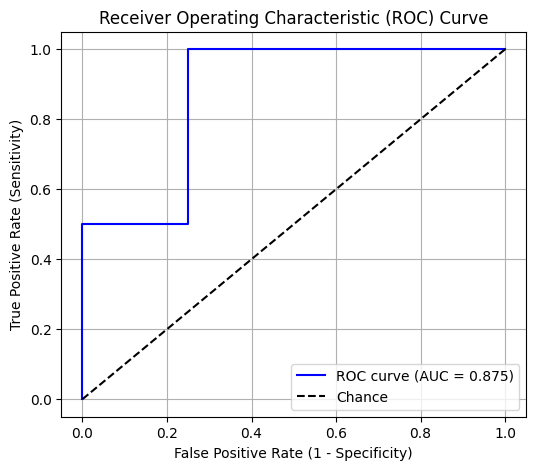

In [48]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Predict probabilities
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Compute Sensitivity and Specificity for each threshold
specificity = 1 - fpr  # Specificity = 1 - False Positive Rate


# --- Plot ROC Curve ---
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Chance')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from sklearn.metrics import confusion_matrix

# Predict class labels
y_pred = rf.predict(X_test)

# Confusion matrix: TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall for positive class)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


Sensitivity: 0.500
Specificity: 0.750
